In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from models import Dim
from datasets import fifa
import matplotlib.pyplot as plt

# Instantiate dim. red. framework
dim = Dim()

# Load dataset
fifa = fifa()

X_train, X_test, y_train, y_test = train_test_split(fifa.X, fifa.y, test_size=0.1, random_state=33)
dim.col_names = fifa.col_names
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.new_dim = dict()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
# Obtain reduced space
dim.apply_dim(num_dim=[5], tflag=[3, 6, 7, 8])

('5Dim', 'LLE', 'k=81-reg=0.001'): 100%|██████████| 1/1 [01:29<00:00, 89.88s/it]


In [3]:
# Apply classifiers
scores = dim.apply_clf()
scores.head(5)

SVM:   0%|          | 0/8 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/l

saved as 02-08-12:12(.csv)(.xlsx)


,Model,Accuracy,Params,MAE,Dimensions,Dim. Technique,Dim. Params
21,SVM,0.945205,"{'svm__C': 10, 'svm__kernel': 'rbf'}",0.090411,5Dim,LOL,
7,XGBoost,0.942466,{'xgb__n_estimators': 20},0.090411,5Dim,LLE,k=81-reg=0.001
31,Decision Tree,0.941096,{'dt__max_depth': 5},0.091781,5Dim,LLE,k=81-reg=0.001
47,Random Forest,0.938356,"{'rf__max_depth': 5, 'rf__n_estimators': 100}",0.091781,5Dim,LLE,k=81-reg=0.001
23,SVM,0.938356,"{'svm__C': 10, 'svm__kernel': 'rbf'}",0.095890,5Dim,LLE,k=81-reg=0.001


In [4]:
# Get the variability 
weights = dim.get_weights().droplevel(3, axis=1)
weights

5Dim                                                         \
               SLMVP                                PCA      KPCA       LOL   
  Polynomial-Order=5 Linear Radial-Gammas=0.1              Radial             
0                0.2    0.2               0.2  0.512400  0.262235  0.748348   
1                0.2    0.2               0.2  0.291222  0.184473  0.251534   
2                0.2    0.2               0.2  0.122414  0.184454  0.000047   
3                0.2    0.2               0.2  0.050965  0.184421  0.000040   
4                0.2    0.2               0.2  0.023000  0.184417  0.000031   

                            
        LPP            LLE  
        k=5 k=81-reg=0.001  
0  0.003098            0.2  
1  0.240865            0.2  
2  0.245654            0.2  
3  0.253836            0.2  
4  0.256547            0.2

In [8]:
# Get the  correlations
df = dim.get_corr_table(5, abs=False)


100%|██████████| 8/8 [00:00<00:00, 41.13it/s]


In [9]:
df

5Dim                                \
                                         SLMVP                                 
                            Polynomial-Order=5                                 
                                             0         1         2         3   
attacking_crossing                   -0.762143  0.002619  0.060230 -0.119662   
attacking_finishing                  -0.445992 -0.788487  0.061691  0.014984   
attacking_heading_accuracy            0.144767 -0.030266  0.254816  0.298512   
attacking_short_passing              -0.594272  0.070639  0.086877  0.012542   
attacking_volleys                    -0.508005 -0.738776  0.058284 -0.004134   
skill_dribbling                      -0.652526 -0.394780  0.065299  0.052260   
skill_curve                          -0.799433 -0.324947  0.078338 -0.095989   
skill_fk_accuracy                    -0.735855 -0.248962  0.046166 -0.324601   
skill_long_passing                   -0.620901  0.340550  0.053526 -0.075653   
skill_ball_control                   -0.616484 -0.273723  0.151130  0.093496   
movement_acceleration                -0.241866 -0.241072 -0.164552  0.042771   
movement_sprint_speed                -0.185305 -0.222727 -0.043886  0.083499   
movement_agility                     -0.467425 -0.262597 -0.123266  0.179310   
movement_reactions                   -0.434911 -0.014214  0.148201  0.351180   
movement_balance                     -0.318070 -0.133716 -0.258014  0.014103   
power_shot_power                     -0.525294 -0.491518  0.250093 -0.018229   
power_jumping                         0.136604  0.087471 -0.446190  0.402848   
power_stamina                        -0.328575  0.144299 -0.125233  0.325459   
power_strength                        0.273124  0.066295  0.332246  0.117014   
power_long_shots                     -0.642038 -0.578763  0.081239 -0.011218   
mentality_aggression                 -0.170547  0.409823  0.064107  0.349478   
mentality_interceptions              -0.160970  0.898310  0.047330  0.122202   
mentality_positioning                -0.568233 -0.648796 -0.062112  0.056058   
mentality_vision                     -0.746194 -0.311767 -0.100249 -0.108083   
mentality_penalties                  -0.357433 -0.709937  0.059739 -0.156096   
mentality_composure                  -0.530010 -0.085074  0.328459  0.336625   
defending_marking_awareness          -0.127686  0.891085  0.080307  0.121350   
defending_standing_tackle            -0.102810  0.925278  0.029527  0.032569   
defending_sliding_tackle             -0.080277  0.950313  0.003512  0.005272   

                                                                               \
                                                                                
                                         Linear                                 
                                    4         0         1         2         3   
attacking_crossing           0.075645  0.021345 -0.461446 -0.440273 -0.159828   
attacking_finishing         -0.038398 -0.812080 -0.390425 -0.219672 -0.054072   
attacking_heading_accuracy   0.193524 -0.039074 -0.060129 -0.088019  0.037923   
attacking_short_passing      0.134262  0.089939 -0.554871 -0.315256  0.123866   
attacking_volleys            0.010091 -0.720031 -0.430493 -0.336120 -0.005076   
skill_dribbling              0.069446 -0.419945 -0.548544 -0.291755 -0.163632   
skill_curve                  0.024827 -0.308454 -0.678416 -0.373209 -0.045459   
skill_fk_accuracy            0.002087 -0.204655 -0.615298 -0.402040  0.222689   
skill_long_passing           0.086860  0.359469 -0.582989 -0.325024  0.111315   
skill_ball_control           0.129968 -0.287555 -0.571681 -0.304627 -0.036957   
movement_acceleration        0.177839 -0.240643 -0.077548  0.118012 -0.418239   
movement_sprint_speed        0.355809 -0.237402 -0.064088  0.185716 -0.468705   
movement_agility            -0.028022 -0.255404 -0.166547 -0.232101 -0.175577   
movement_reactions      

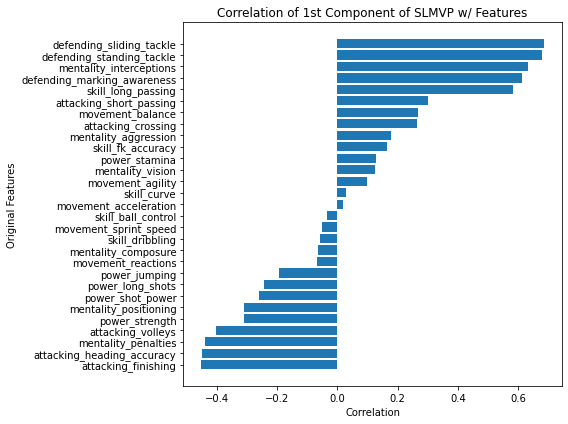

In [11]:
# Plot correlations

# First Component
values = df[('5Dim', 'SLMVP',  'Radial-Gammas=0.1', 0)].sort_values(ascending=True)#[-20:]
categories = values.index
# Create horizontal bar plot
plt.figure(figsize=(8, 6))
plt.barh(categories, values)
# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Original Features')
plt.title('Correlation of 1st Component of SLMVP w/ Features')
plt.tight_layout()
plt.savefig('plots/hbar_fifa_neg1.png')